In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px


In [13]:
df = pd.read_csv('dow_jones_index.csv')
batch_size = 100

# Introduction

## Exploratory Data Analysis (EDA) Report

The Dow Jones Index data set represents hundreds of Stocks with their meta data (included below). The data is structured as a csv with each row representing a stock with its ticker and meta data.



## Data Overview:

The dataset contains historical stock prices of the Dow Jones Index from January 2011 to December 2011. The dataset contains the following columns:

- quarter: the fiscal quarter in which the stock price was recorded
- stock: the stock symbol of the company
- date: the date on which the stock price was recorded
- open: the opening price of the stock
- high: the highest price of the stock during the day
- low: the lowest price of the stock during the day
- close: the closing price of the stock
- volume: the total number of shares traded during the day
- percent_change_price: the percentage change in price from the previous day
- percent_change_volume_over_last_wk: the percentage change in volume from the previous week
- previous_weeks_volume: the total volume of shares traded during the previous week
- next_weeks_open: the opening price of the stock during the next week
- next_weeks_close: the closing price of the stock during the next week
- percent_change_next_weeks_price: the percentage change in price from this week to next week
- days_to_next_dividend: the number of days until the next dividend payment
- percent_return_next_dividend: the percentage return on investment from holding until next dividend payment


## Data Cleaning: 

The data is for the most part cleaned, without any missing values or any typos that can affect the statistics for the data frame. The only cleaning we have done is changing the date column to be date objects, and converting the open, close, high, low columns to be integers because the csv vomes with a $ before each value in these columns, making it a string.

In [14]:
# Convert 'date' column to datetime data type
df['date'] = pd.to_datetime(df['date'])

# Remove the dollar sign from the 'open', 'high', 'low', and 'close' columns and convert them to a numeric data type
cols_to_convert = ['open', 'high', 'low', 'close']
df[cols_to_convert] = df[cols_to_convert].replace('[\$,]', '', regex=True).astype(float)


## Descriptive Statistics

Let's start by examining some basic descriptive statistics for our dataset. This will provide us with a general understanding of the data's central tendency, dispersion, and distribution.



In [15]:
df.describe()

,quarter,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
count,750.000000,750.000000,750.000000,750.000000,750.000000,7.500000e+02,750.000000,720.000000,7.200000e+02,750.000000,750.000000,750.000000
mean,1.520000,53.651840,54.669987,52.640160,53.729267,1.175478e+08,0.050262,5.593627,1.173876e+08,0.238468,52.525333,0.691826
std,0.499933,32.638852,33.215994,32.119277,32.788787,1.584381e+08,2.517809,40.543478,1.592322e+08,2.679538,46.335098,0.305482
min,1.000000,10.590000,10.940000,10.400000,10.520000,9.718851e+06,-15.422900,-61.433175,9.718851e+06,-15.422900,0.000000,0.065574
25%,1.000000,29.830000,30.627500,28.720000,30.365000,3.086624e+07,-1.288053,-19.804284,3.067832e+07,-1.222068,24.000000,0.534549
50%,2.000000,45.970000,46.885000,44.800000,45.930000,5.306088e+07,0.000000,0.512586,5.294556e+07,0.101193,47.000000,0.681067
75%,2.000000,72.715000,74.287500,71.037500,72.667500,1.327218e+08,1.650888,21.800622,1.333230e+08,1.845562,69.000000,0.854291
max,2.000000,172.110000,173.540000,167.820000,170.580000,1.453439e+09,9.882230,327.408924,1.453439e+09,9.882230,336.000000,1.564210


## Distribution of Stock Prices

To understand the distribution of stock prices in the Dow Jones Index, we plotted a histogram of the 'close' column, which represents the closing price of each stock. The histogram shows that the majority of the stock prices are between 0 and 50 dollars, with a few outliers above $145.

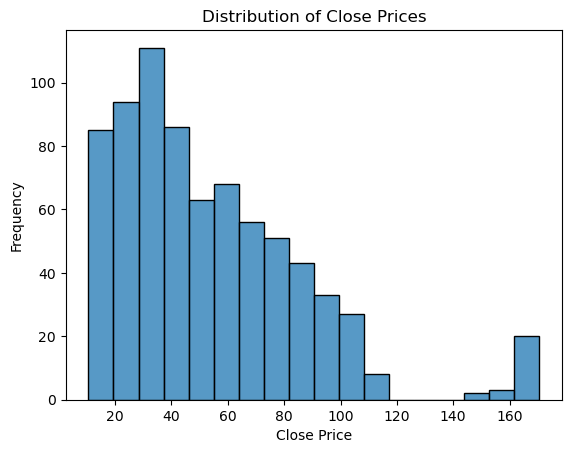

In [16]:
sns.histplot(df['close'])
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

## Closing Price vs. Volume

Now, we'll create a scatter plot to visualize the relationship between the closing price and volume for each stock. This can help us identify any potential correlation between the two variables. 

From the visualization there seems to be some negative correlation between the volume of a stock and the closing price.


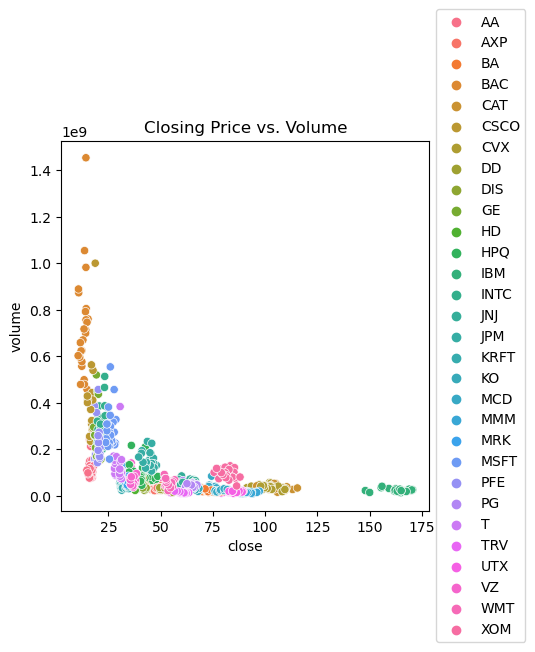

In [17]:
sns.scatterplot(data=df, x='close', y='volume', hue='stock')
plt.title('Closing Price vs. Volume')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplots_adjust(right=0.7)
plt.show()

## Correlation Heatmap

Finally, we'll create a correlation heatmap to explore the relationships between all features in the dataset. This can help us identify any strong correlations or potential multicollinearity between variables. The visualization shows the 
strong correlation between open, high, low, and close. This makes sense because for many of the stocks, the price can be around the same with the market's ups and downs. There is also a negative correlation between volume and the previously stated variables. This can be due to the fact that a stock with a large price will not be traded as much because of its high price, while a stock with lower price will be traded more because people will tend to make trades in large orders to increase their profit. 

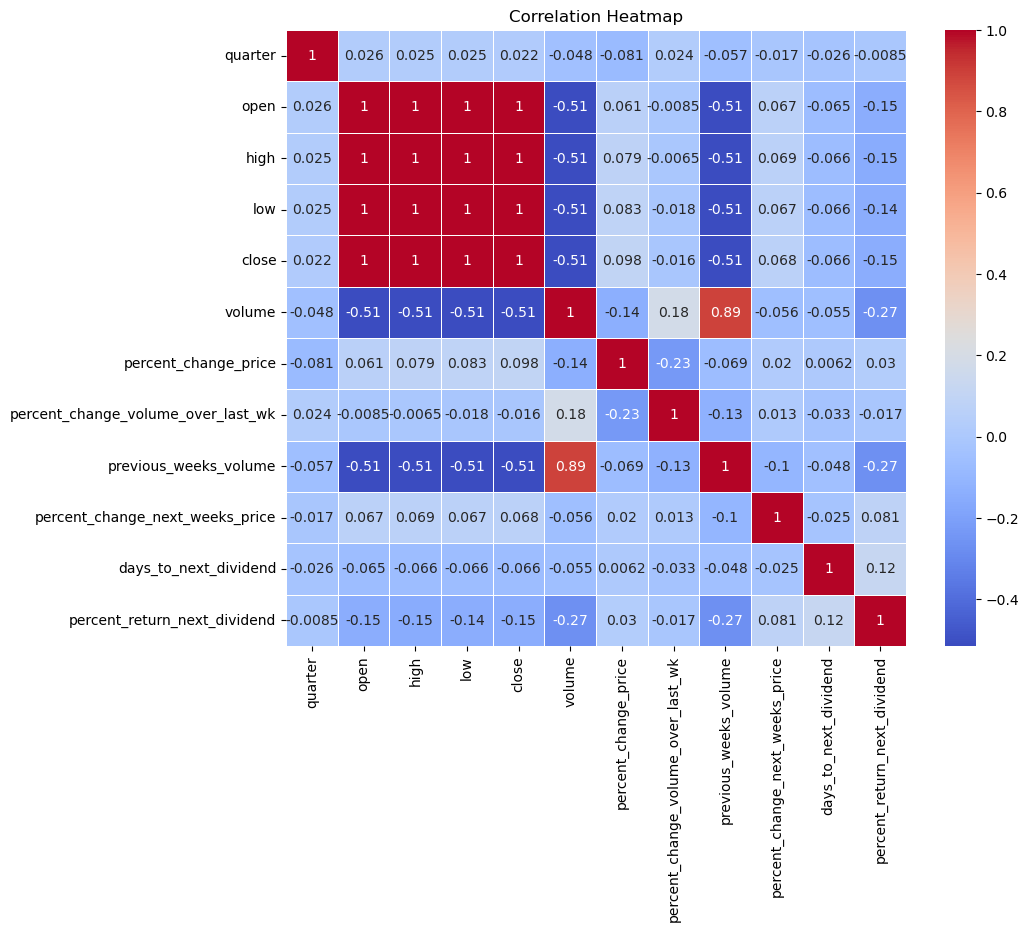

In [18]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## Top Performing Ticker

The stock with the highest percentage change will be considered the top performer.


In [19]:
# Calculate the percentage change for each stock
percent_change = df.groupby('stock')['percent_change_price'].first()


# Find the top-performing ticker
top_performing_ticker = percent_change.idxmax()
top_performance = percent_change.max()

In [20]:
print(f"The top-performing ticker is {top_performing_ticker} with a percentage change of {top_performance:.2f}%.")

The top-performing ticker is HPQ with a percentage change of 6.80%.


## Monthly Trends

Next, let's analyze the monthly trends for the closing prices and volumes of the stocks by average volume.
Just from the summary statistics, the month of May seems to have the highest close price average and January seems to have the highest volume average.

In [21]:
# Create a new DataFrame with monthly data
df_monthly = df.copy()
df_monthly['month'] = df_monthly['date'].dt.to_period('M')

# Calculate the average closing price and volume for each stock by month
monthly_trends_all = df_monthly.groupby(['stock', 'month']).agg({'close': 'mean', 'volume': 'mean'}).reset_index()
monthly_trends_all['month'] = monthly_trends_all['month'].dt.to_timestamp()
monthly_trends_all.sort_values(by='month', inplace=True)
monthly_trends_all['month_name'] = monthly_trends_all['month'].dt.strftime('%b')

monthly_trends_all.groupby('month_name', sort=False).describe()


close                                                      \
           count       mean        std      min        25%       50%   
month_name                                                             
Jan         30.0  51.924333  30.603206  14.3375  28.981875  45.56875   
Feb         30.0  53.828083  32.862676  14.5025  28.993125  46.65750   
Mar         30.0  53.174000  32.972119  13.9700  29.065000  45.07750   
Apr         30.0  54.977867  34.637203  12.8520  31.247500  46.24700   
May         30.0  55.260750  34.577688  11.8775  32.174375  47.01500   
Jun         30.0  52.898417  33.558584  10.8200  31.473125  44.59625   

                               volume                              \
                 75%       max  count          mean           std   
month_name                                                          
Jan         68.82625  153.1600   30.0  1.365794e+08  2.001133e+08   
Feb         70.12875  163.7425   30.0  1.144534e+08  1.458272e+08   
Mar         69.72375  160.5825   30.0  1.251430e+08  1.544336e+08   
Apr         73.18700  166.6780   30.0  1.060022e+08  1.300039e+08   
May         75.52750  169.1175   30.0  1.114583e+08  1.342752e+08   
Jun         71.39875  164.4350   30.0  1.145370e+08  1.500427e+08   

                                                                   \
                    min           25%           50%           75%   
month_name                                                          
Jan         16142230.25  3.518033e+07  5.550525e+07  1.738465e+08   
Feb         14951007.50  3.317308e+07  5.267266e+07  1.173172e+08   
Mar         18550407.75  3.799760e+07  5.710390e+07  1.370104e+08   
Apr         14111632.80  2.895405e+07  4.486469e+07  1.272719e+08   
May         13216104.50  3.227830e+07  4.868022e+07  1.283991e+08   
Jun         14475642.50  3.434374e+07  5.491451e+07  1.014629e+08   

                          
                     max  
month_name                
Jan         1.062809e+09  
Feb         6.686345e+08  
Mar         7.537356e+08  
Apr         5.665456e+08  
May         5.848284e+08  
Jun         7.405552e+08

### Monthly Closing of All Stocks

Now, let's visualize the average monthly volume for all stocks in the dataset. The visulization shows the average monthly closing price in each stock. There seems to be similarity in the stocks among the months, but some months have clear difference, like January has a generally lower average closing price.


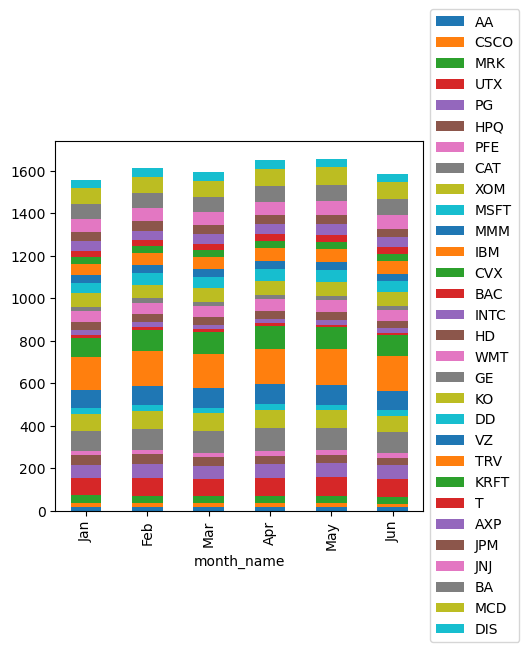

In [32]:
# Pivot the data into a wide format for closing prices and volume
closing_prices_pivot = monthly_trends_all.pivot_table(index='stock', columns='month_name', values='close', sort=False)
volume_pivot = monthly_trends_all.pivot_table(index='stock', columns='month_name', values='volume', sort=False)
closing_prices_pivot


closing_prices_pivot.T.loc[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']].plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplots_adjust(right=0.7)
plt.show()

### Monthly Volume of All Stocks

Now, let's visualize the average monthly volume for all stocks in the dataset. The visulization shows the average monthly volume in each stock. There seems to be similarity in the stocks among the months, but some months have clear difference, like January has a generally higher average volume indicating that more people generally trade their stocks in January.


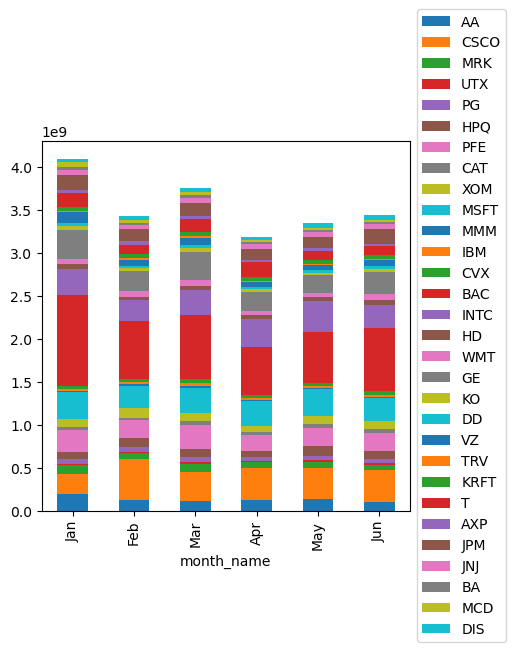

In [34]:
plot_df = volume_pivot.reset_index().melt(id_vars='stock', var_name='month', value_name='volume')
volume_pivot.T.loc[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']].plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplots_adjust(right=0.7)
plt.show()

### Monthly Average Percent Change
Let's see which months have the highest spread in stock prices. This visulization shows the average monthly percent change in price for each stock. The months of February and April contain the some of the highest percent changes (both positively and negatively), corresponding with the increased volumes of the months prior. However, one interesting fact to note is that while June has the lowest percent change of all the months (and mostly negative), there doesn't seem to be much of an explainable reason for it within the data.


In [24]:

# Calculate the average closing price and volume for each stock by month
monthly_trends_percent_change = df_monthly.groupby(['stock', 'month']).agg({'volume': 'mean', 'percent_change_price': 'mean'}).reset_index()
monthly_trends_percent_change['month'] = monthly_trends_percent_change['month'].dt.to_timestamp()
monthly_trends_percent_change.sort_values(by='month', inplace=True)
monthly_trends_percent_change['month_name'] = monthly_trends_percent_change['month'].dt.strftime('%b')



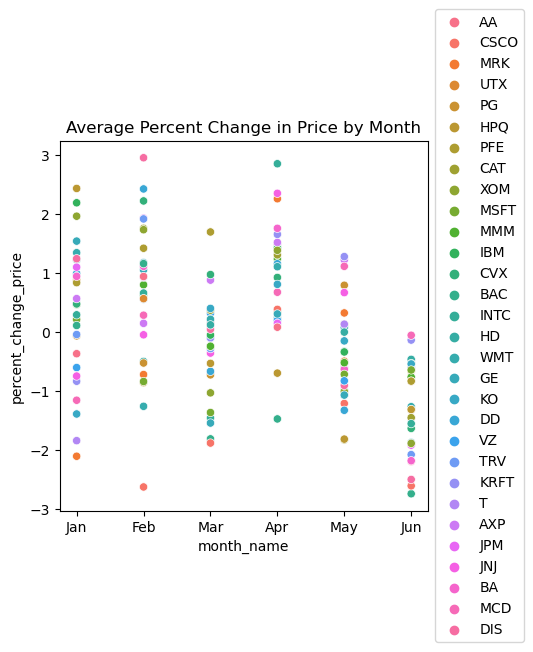

In [30]:
# Create a line plot to show the average percent change in price for each stock per month
sns.scatterplot(data=monthly_trends_percent_change, x='month_name', y='percent_change_price', hue='stock')
plt.title('Average Percent Change in Price by Month')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplots_adjust(right=0.7)
plt.show()

### Quarterly Closing of All Stocks

Now, let's visualize the average quarterly closing for all the stocks. The visualiation shows that generally quarter 2 seems to have higher prices than quarter 1. this could be due to the fact that in general markets increase over time so the overall trends of stocks will go up.


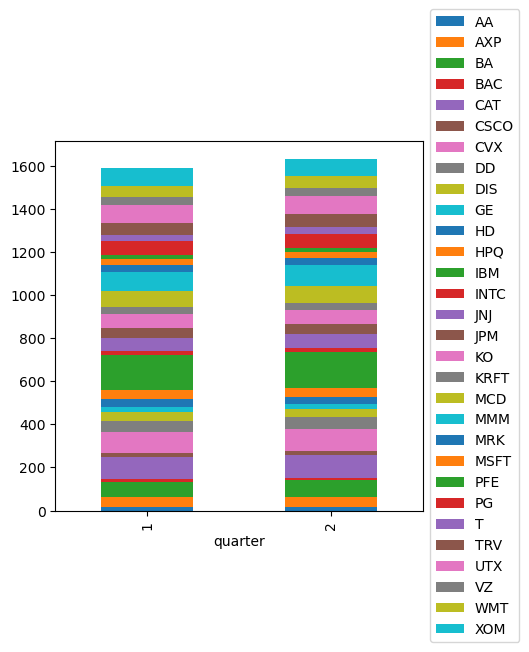

In [42]:

# Create a new DataFrame with quarterly data)
df_quarterly = df.copy()
# Calculate the average closing price and volume for each stock by quarter
quarterly_trends_all = df_quarterly.groupby(['stock', 'quarter']).agg({'close': 'mean', 'volume': 'mean'}).reset_index()
quarterly_trends_all.sort_values(by='quarter', inplace=True)

closing_prices_quarterly_pivot = quarterly_trends_all.pivot_table(index='stock', columns='quarter', values='close', sort=False)

plot_df = closing_prices_quarterly_pivot.reset_index().melt(id_vars='stock', var_name='quarter', value_name='closing_price')
plot_df.pivot(index='quarter', columns='stock', values='closing_price').plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplots_adjust(right=0.7)
plt.show()

### Quarterly Volume of All Stocks

Now, let's visualize the average quarterly Volume for all the stocks. The visualiation shows that generally the volume is higher in quarter 1 than 2. This also goes with the months visualization that generally more trades occur earlier in the year.


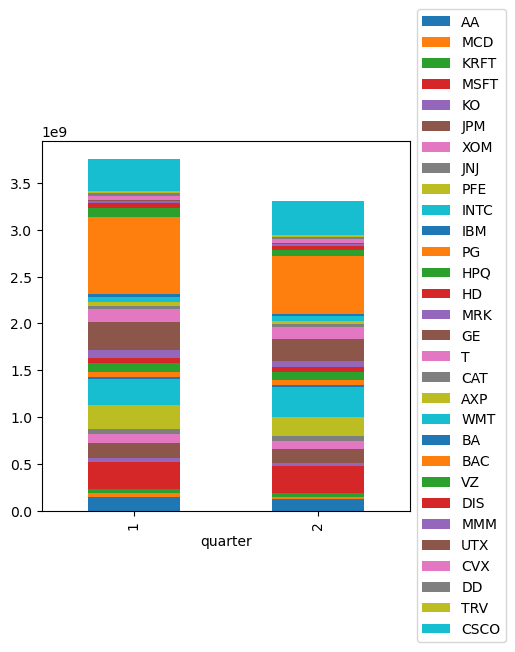

In [45]:
volume_quarterly_pivot = quarterly_trends_all.pivot_table(index='stock', columns='quarter', values='volume', sort=False)
volume_quarterly_pivot.T.plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplots_adjust(right=0.7)
plt.show()